<a href="https://colab.research.google.com/github/yakaboskic/ENGS_108_Fall_2020/blob/master/solutions/assign_3_ENGS_108_Fall_2020_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENGS 108 Fall 2020 Assignment 3**

*Due October 5, 2020 at 11:59PM on Canvas*

**Instructors:** George Cybenko

**TAs:** Chase Yakaboski


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in 
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---

In [1]:
''' Import Statements '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import pickle
import tqdm

## **Data Loading**
Upload the red and synthetic datasets to your google colab session using Google Drive. Read the following [tutorial](https://github.com/yakaboskic/ENGS_108_Fall_2020) for how to get setup. 

In [2]:
dataset_base_path = '/content/sample_data'

#TODO: Set your base datasets path. This is my base path, you will need to change to match yours. 
dataset_github_path = '/content/drive/My Drive/git/ENGS_108_Fall_2020/datasets'

In [3]:
#-- Load California Housing Data
calif_train_df = pd.read_csv(os.path.join(dataset_base_path, 'california_housing_train.csv'))
calif_test_df = pd.read_csv(os.path.join(dataset_base_path, 'california_housing_test.csv'))

#-- Load Wine Data
red_train_path = os.path.join(dataset_github_path, 'red_train.csv')
red_valid_path = os.path.join(dataset_github_path, 'red_valid.csv')
red_test_path = os.path.join(dataset_github_path, 'red_test.csv')
red_train_df = pd.read_csv(red_train_path)
red_valid_df = pd.read_csv(red_valid_path)
red_test_df = pd.read_csv(red_test_path)

#-- Load Cyrillic Data
with open(os.path.join(dataset_github_path, 'cyrillic_data.pk'), 'rb') as f_:
  cyrillic, letter_map = pickle.load(f_)

## **Problem 1: Linear Regression**
In this problem, you will be building a linear regression model to predict California Housing prices with the dataset that is provided with google colab. 
>
> **Part 1** A reasonable first step in every machine learning task is to understand the dataset at hand. Proceed to explore this problem’s dataset by addressing the following:
>> **(a)** Using the pandas DataFrame *calif_train_df* that is already loaded for you. Print a statistical summary of the data. *Hint: There is a nice pandas function to do this, research the documentation and find it.* 

In [4]:
calif_train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


>> **(b)** Visualize the longitute and latitude features through a scatterplot and report on what the plot resembles. Maybe try playing with the graph opacity to yeild more sophisticated visualization.

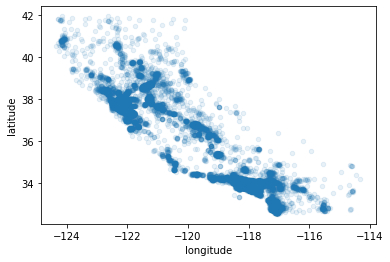

In [5]:
calif_train_df.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)

> **Part 2** Now we will build our linear regression model.
>> **(a)** Using an appropriate library (such as scikit-learn), build a linear regression model on the training data so that you are using all available features to predict the median housing price of a new california district. 

In [6]:
from sklearn.linear_model import LinearRegression

#-- Seperate the data
X = copy.copy(calif_train_df.iloc[:, :-1])
y = copy.copy(calif_train_df.iloc[:, -1])

def buildModelLinear(X, y):
  ''' Return a trained linear regression model on your dataset. '''
  model = LinearRegression()
  model.fit(X, y)
  return model

model = buildModelLinear(X, y)

>> **(b)** What is the largest coefficient of the linear model and which feature is associated with it?

In [7]:
max_ = max(model.coef_)
print('Max coefficient: {}'.format(max_))
print('Associated Feature: {}'.format(calif_train_df.columns[list(model.coef_).index(max_)]))

Max coefficient: 40507.06835939748
Associated Feature: median_income


>> **(c)** Choose an appropriate metric to calculate the accuracy/error of your linear regression model.

In [8]:
from sklearn.metrics import mean_squared_error
X_test = calif_test_df.iloc[:, :-1]
y_test = calif_test_df.iloc[:, -1]

print('R^2 value: {}'.format(model.score(X_test, y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

R^2 value: 0.6195057678312047
RMSE: 69765.36022216761


>> **(d)** Say instead of modeling every feature as linear, we think that median home price varies quadratically with median income. Build and train a model that uses this assumption and compare its accuracy/error to the pure linear model. Which model would you choose and why?

In [9]:
X.loc[:,'median_income'] = X.loc[:,'median_income']**2
model_poly = buildModelLinear(X, y)
print('R^2 value: {}'.format(model_poly.score(X_test, y_test)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, model_poly.predict(X_test)))))

R^2 value: 0.22595304561038743
RMSE: 99506.04275726451


>>> Defintely choose the linear model.

## **Problem 2: Logistic Regression**
In this problem, you will be building a classification model using linear functions to predict wine quality. 
>
> **Part 1** Let's begin this analysis by assuming we have talked to a wine sommelier about what attributes make a good wine. Our wine sommelier has told us that fixed acidity and alcohol concentration are the primary attributes that differentiate a "good wine" from a "bad wine."
>
>> **(a)** Let's assume that we can classify a "good wine" as a quality level of 7 or 8, and a "bad wine" has a quality of below 5. Choose an appropriate graph, plot fixed acidity and alcohol concentration of both "good wines" and "bad wines." Use the *red_train_df* dataset for these questions.

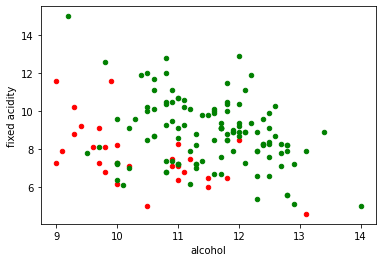

In [11]:
bad_quality = red_train_df[red_train_df['quality'] < 5]
good_quality = red_train_df[red_train_df['quality'] >= 7]
ax = plt.subplot()
bad_quality.plot(kind='scatter', c='red', x='alcohol', y='fixed acidity', ax=ax)
good_quality.plot(kind='scatter', c='green', x='alcohol', y='fixed acidity', ax=ax)

>> **(b)** Based on your plot in (a) could you use these features to perfectly delineate between "good" and "bad" wines? I.e. are these two features [linearly separable](https://en.wikipedia.org/wiki/Linear_separability)?

The data clearly shows that their is no linear decision boundary. 

>> **(c)** Do you agree with the wine sommelier in their assessment about these two features? Explain your answer. 

I do not completely agree with the sommelier since the data is not linearly seperable in terms of alcohol content and fixed acidity, there is no perfect linear classifier that can delineate between good and bad wines scrictly on these features. However, even tho not linearly seperable, there is still a slight partitioning so these features might offer a degree of predictive power but not as much as what the sommelier suggests. 

> **Part 2** Now use the [sklearn linear classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) to build a linear function to classify wine quality based on all features of the dataset.
>
>> **(a)** Using a least squares loss function and stocastic gradient descent, fit a linear model to the training data and report accuracy on the test data. Trying running your code multiple times, what happens? Explain your observations.

In [13]:
from sklearn.linear_model import SGDClassifier

def makeClassifier(dataset, loss_function='squared_loss'):
  X = dataset.drop('quality', axis=1).to_numpy()
  y = dataset['quality'].to_numpy()
  model = SGDClassifier(loss=loss_function)
  model.fit(X,y)
  #print('Training accuracy: {}'.format(model.score(X,y)))
  return model

model = makeClassifier(red_train_df)

X_test = red_test_df.drop('quality', axis=1).to_numpy()
y_test = red_test_df['quality'].to_numpy()

print('Accuracy: {}'.format(model.score(X_test, y_test)))

Accuracy: 0.08125


If you run this code multiple times, the accuracy does not converge meaning many local minima exist.

>> **(b)** Using a logistic regression loss function and stocastic gradient descent, fit a linear model to the training data and report accuracy on the test data. Do the observations you saw after running your code multiple times in (a) hold for logistic regression? Why or why not.

In [ ]:
model = makeClassifier(red_train_df, loss_function='log')
print('Accuracy: {}'.format(model.score(X_test, y_test)))

Accuracy: 0.42083333333333334


The logistic regression has much greater stability and convergence.

>> **(c)** We learned in class that there are a couple hyperparameters that can be used in stocastic gradient descent. One very important one is learning rate. Using your logistic regression model in (b) vary the learning rate (i.e. $\alpha$ and set learning_rate argument to 'constant'), train the classifier on the training dataset, and use the validation set to choose the best model, and report the accuracy of this model on the testing dataset.

In [14]:
def makeClassifierWithLearningRate(dataset, alpha, loss_function='log'):
  X = dataset.drop('quality', axis=1).to_numpy()
  y = dataset['quality'].to_numpy()
  model = SGDClassifier(loss=loss_function, eta0=alpha, learning_rate='constant')
  model.fit(X,y)
  #print('Training accuracy: {}'.format(model.score(X,y)))
  return model

best_model = None
best_score = 0
X_valid = red_valid_df.drop('quality', axis=1).to_numpy()
y_valid = red_valid_df['quality'].to_numpy()

for alpha in np.linspace(.01, .1):
  model = makeClassifierWithLearningRate(red_train_df, alpha)
  score = model.score(X_valid, y_valid)
  #print('Validation Score: {}'.format(score))
  if score > best_score:
    best_score = score
    best_model = model

print('Best Model Accuracy: {}'.format(best_model.score(X_test, y_test)))

Best Model Accuracy: 0.4875


## **Problem 3: Cyrillic Dataset**

In this problem, we will put many of the techniques we've learned together to compare different ways to classify handwritten Russia Cyrillic letters. The dataset has already been converted for you into a numpy array with the first column delineating the letter class as an integer value. A letter_map dictionary provides a simple mapping from these integers to the associated cyrillic character.
>
> **(a)** Produce a distance matrix between characters using the Hamming distance, where the distance is smallest for characters that are *similar*. 

In [15]:
#-- Get an average value of each cyrillic letter
#-- then calculate distances between 34 average letters
cyrillic_dict = dict()
for example in list(cyrillic):
  label = example[0]
  data = example[1:]
  if label in cyrillic_dict:
    cyrillic_dict[label].append(data)
  else:
    cyrillic_dict[label] = [data]

avg_cryllic = []
for label in range(len(cyrillic_dict)):
  avg_cryllic.append(np.array(cyrillic_dict[label]).mean(axis=0))

avg_cryllic = np.array(avg_cryllic)

In [16]:
def hamming_distance(a, b):
  distance_counter = 0
  for idx in range(len(a)):
    if a[idx] != b[idx]:
      distance_counter += 1
  return distance_counter

In [17]:
from scipy.spatial.distance import hamming
mat = []
for example_1 in tqdm.tqdm(list(avg_cryllic)):
  dist_1 = []
  for example_2 in list(avg_cryllic):
    dist_1.append(hamming(example_1, example_2))
  mat.append(dist_1)
mat = np.array(mat)

100%|██████████| 34/34 [00:00<00:00, 927.51it/s]


In [20]:
mat

array([[0.        , 0.8279321 , 0.72839506, ..., 0.64506173, 0.81018519,
        0.78549383],
       [0.8279321 , 0.        , 0.86265432, ..., 0.83024691, 0.88348765,
        0.88040123],
       [0.72839506, 0.86265432, 0.        , ..., 0.75      , 0.83796296,
        0.82253086],
       ...,
       [0.64506173, 0.83024691, 0.75      , ..., 0.        , 0.80324074,
        0.79166667],
       [0.81018519, 0.88348765, 0.83796296, ..., 0.80324074, 0.        ,
        0.85339506],
       [0.78549383, 0.88040123, 0.82253086, ..., 0.79166667, 0.85339506,
        0.        ]])

> **(b)** Produce a distance matrix between characters using the Hamming distance, where the distance is smallest for characters that are *most different*. 

In [18]:
def hamming_distance_reverse(a, b):
  distance_counter = 0
  for idx in range(len(a)):
    if a[idx] == b[idx]:
      distance_counter += 1
  return distance_counter

In [19]:
from scipy.spatial.distance import hamming
mat_inv = []
for example_1 in tqdm.tqdm(list(avg_cryllic)):
  dist_1 = []
  for example_2 in list(avg_cryllic):
    dist_1.append(1 - hamming(example_1, example_2))
  mat_inv.append(dist_1)
mat_inv = np.array(mat_inv)

100%|██████████| 34/34 [00:00<00:00, 1095.53it/s]


In [21]:
mat_inv

array([[1.        , 0.1720679 , 0.27160494, ..., 0.35493827, 0.18981481,
        0.21450617],
       [0.1720679 , 1.        , 0.13734568, ..., 0.16975309, 0.11651235,
        0.11959877],
       [0.27160494, 0.13734568, 1.        , ..., 0.25      , 0.16203704,
        0.17746914],
       ...,
       [0.35493827, 0.16975309, 0.25      , ..., 1.        , 0.19675926,
        0.20833333],
       [0.18981481, 0.11651235, 0.16203704, ..., 0.19675926, 1.        ,
        0.14660494],
       [0.21450617, 0.11959877, 0.17746914, ..., 0.20833333, 0.14660494,
        1.        ]])

> **(c)** Build a k-nn classifier for the cyrillic dataset by first shuffling the data and holding out 20% of the data for cross validation. Report your accuracy on this holdout set. 

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = cyrillic[:,1:]/255
y = cyrillic[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)
#-- You can use Nearest Neighbors as well but then you'll have to calculate accuracy score manually.

0.6411498708010336

> **(d)** Build a decision tree classifier for the cyrillic dataset using the same training and holdout dataset you used in (c). Report your accuracy on this holdout set. 

In [24]:
from sklearn.tree import DecisionTreeClassifier

modeltree = DecisionTreeClassifier()
modeltree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
modeltree.score(X_test, y_test)

0.4305555555555556

> **(e)** Build a logistic classifier for the cyrillic dataset using the same training and holdout dataset you used in (c). Report your accuracy on this holdout set. 

In [26]:
from sklearn.linear_model import SGDClassifier

modellog = SGDClassifier(loss='log')
modellog.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
modellog.score(X_test, y_test)

0.5368217054263565

> **(f)** Compare all your different models and report which was best and why you think the best performing model worked better than the others. 

KNN worked the best. This is likely because of the feature size was large and many local minima exist when preforming stocastic gradiant descent. KNN has the advantage of only looking at the closest vectors in the feature space and since different characters are likely to have much greater distances than similar characters, it was able pick out those similarities easier.

